In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import bt

import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()

# Date range
start = '2004-01-01'
end = '2024-12-30'

# Tickers of assets
tickers = [
    'SPY',  # 미국 주식
    'IEV',  # 유럽 주식 
    'EWJ',  # 일본 주식
    # 'EEM',  # 이머징 주식
    'TLT',  # 미국 장기채
    'IEF',  # 미국 중기채
    'SHY',  # 미국 단기채
    'VNQ',  # 미국 리츠
    'RWX',  # 글로벌 리츠
    'GLD',  # 금
    'DBC',  # 상품
    'INDA', # 인도 주식
    'EWY', # kospi
]
exrate = ['USDKRW=X']
downloads = tickers + exrate
downloads.sort()

# Downloading the data
data = yf.download(downloads, start=start, end=end)

# Adjust Close 데이터 추출
data_adj_close = data.loc[:, ('Adj Close', slice(None))]
data_adj_close.columns = data_adj_close.columns.droplevel(0)

# 환율 데이터 추출
exrate_data = data_adj_close['USDKRW=X']

# 자산 가격 데이터를 원화로 변환
assets_krw = data_adj_close[tickers].multiply(exrate_data, axis=0)

# 일일 수익률 계산
# assets = assets_krw.pct_change().dropna()
assets = assets_krw.dropna()
display(assets.head())

[*********************100%%**********************]  13 of 13 completed


Ticker,SPY,IEV,EWJ,TLT,IEF,SHY,VNQ,RWX,GLD,DBC,INDA,EWY
Date,,,,,,,,,,,,
2012-02-03,119584.314374,28715.236743,35449.633094,94983.088636,92573.238108,81517.241878,43050.979028,21759.438407,187354.459225,29135.677543,26114.202541,54072.779284
2012-02-06,119140.763569,28450.358150,35232.148857,95636.391213,92545.904260,81250.034103,42784.442509,21559.852362,186271.939676,29190.632710,25830.143194,53259.874654
2012-02-07,119978.052035,28771.850335,35757.374076,94874.251629,92362.174071,81595.313768,42867.487711,21729.680075,189928.228298,29301.022232,25711.160126,53829.126991
2012-02-08,120011.532734,28787.513101,35807.973245,94693.153957,92158.523706,81376.598657,42827.287997,21786.831203,188079.691772,29356.057864,25925.311223,54133.125821
2012-02-09,120194.821392,28872.607629,35707.722380,94010.523216,91972.428585,81359.869160,42526.352247,21823.059492,187594.334770,29518.118264,25863.940737,54165.983150


In [22]:
# create the strategy
s1 = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

s2 = bt.Strategy('s2', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(SPY=0.190468, IEV=0.084771, EWJ=0.091689, TLT=0.060323, IEF=0.118450, SHY=0.142737, VNQ=0.074987, RWX=0.045020, GLD=0.071921, DBC=0.015224, INDA=0.071207, EWY=0.033202
),
                       bt.algos.Rebalance()])

s3 = bt.Strategy('s3', [bt.algos.RunQuarterly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(SPY=0.190468, IEV=0.084771, EWJ=0.091689, TLT=0.060323, IEF=0.118450, SHY=0.142737, VNQ=0.074987, RWX=0.045020, GLD=0.071921, DBC=0.015224, INDA=0.071207, EWY=0.033202
),
                       bt.algos.Rebalance()])

In [23]:
# 백테스트 생성
backtest1 = bt.Backtest(s1, assets)
backtest2 = bt.Backtest(s2, assets)
backtest3 = bt.Backtest(s3, assets)

# 백테스트 실행
result = bt.run(backtest1, backtest2, backtest3)

100%|██████████| 3/3 [00:00<00:00,  4.59it/s]


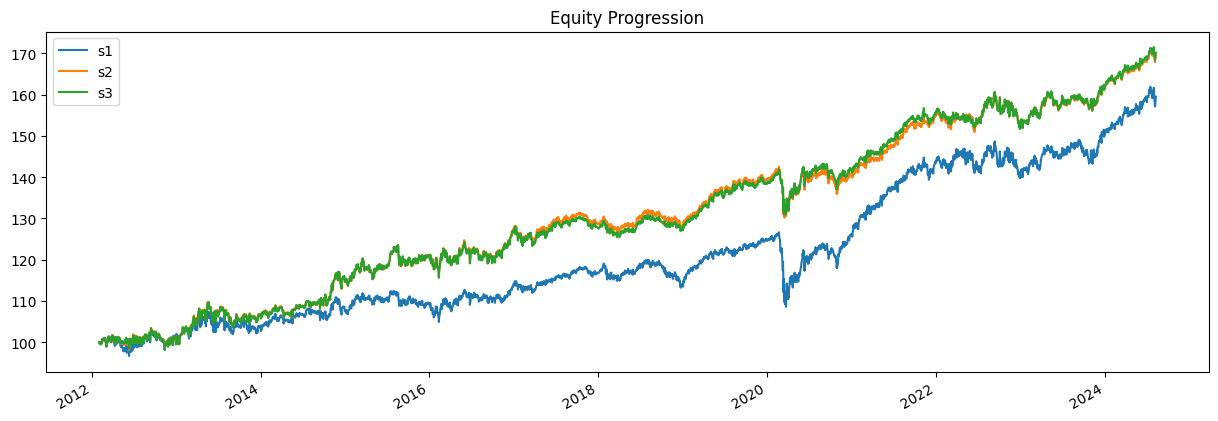

In [24]:
import matplotlib.pyplot as plt

result.plot()
plt.show()

In [25]:
display(result.stats)

,s1,s2,s3
start,2012-02-02 00:00:00,2012-02-02 00:00:00,2012-02-02 00:00:00
end,2024-08-09 00:00:00,2024-08-09 00:00:00,2024-08-09 00:00:00
rf,0.0,0.0,0.0
total_return,0.595244,0.696988,0.70171
cagr,0.038015,0.043155,0.043386
max_drawdown,-0.142717,-0.086771,-0.077429
calmar,0.266365,0.497341,0.560336
mtd,-0.013271,-0.008006,-0.007984
three_month,0.020405,0.01972,0.019664
six_month,0.044074,0.037552,0.039042


AttributeError: 'NoneType' object has no attribute 'plot'

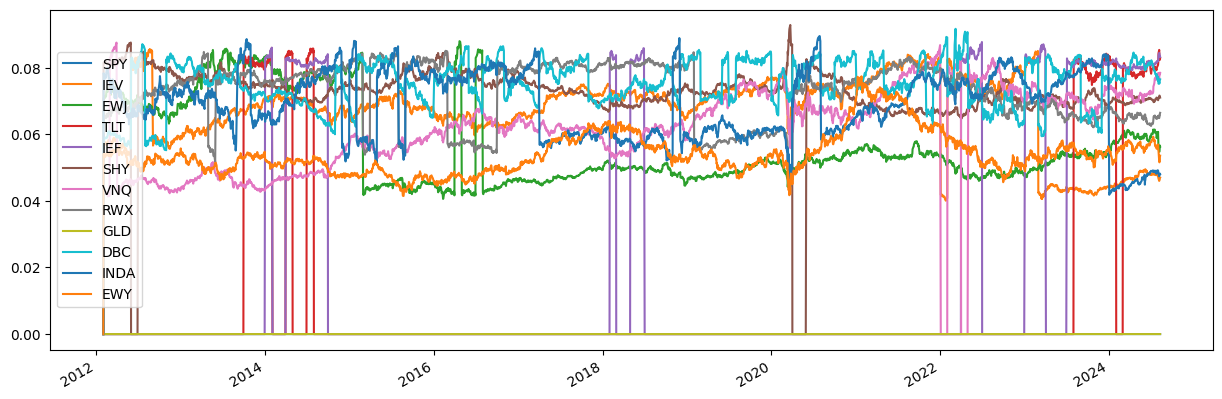

In [11]:
from matplotlib import cm

ax = result.plot_security_weights().plot.area(figsize=(10, 5))
plt.show()